In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from feature_selector import FeatureSelector
from matplotlib import pyplot as plt
from IPython.display import display

Using TensorFlow backend.


In [2]:
# Load data
data = pd.read_csv("../data/output.csv")
data.dropna(inplace=True)

In [3]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [4]:
print(len(X.index))
print(len(X.columns))

155
107


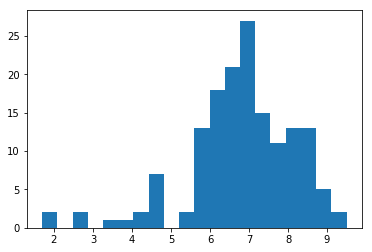

In [5]:
# Histogram of the data
plt.hist(y, bins=20)
plt.show()

In [7]:
# Approx same size buckets 
y_db = y.copy() 
for i in range(len(y)):
    if y[i] < 6.5:
        y_db[i] = 0
    elif y[i] < 7.25:
        y_db[i] = 1
    else: 
        y_db[i] = 2

In [6]:
# More meaningful buckets 
y_dm = y.copy() 
for i in range(len(y)):
    if y[i] < 5:
        y_dm[i] = 0
    elif y[i] < 7.5:
        y_dm[i] = 1
    else: 
        y_dm[i] = 2

In [9]:
# Failed or Passed
y_ds = y.copy() 
for i in range(len(y)):
    if y[i] < 5:
        y_ds[i] = 0
    else:
        y_ds[i] = 1

In [7]:
# CHoose which labels you want to use
y_d = y_dm

In [8]:
y_dh = keras.utils.to_categorical(y_d)

In [9]:
y_d.groupby(y_d).count()

FINAL
0.0    15
1.0    95
2.0    45
Name: FINAL, dtype: int64

In [10]:
X_std = MinMaxScaler().fit_transform(X)
print(X_std)

[[0.         0.         0.41666667 ... 0.04761905 0.         0.        ]
 [0.         0.         0.         ... 0.0952381  0.         0.        ]
 [0.         0.         0.08333333 ... 0.0952381  0.         0.        ]
 ...
 [0.         0.         0.08333333 ... 0.04761905 0.         0.        ]
 [0.5        0.         0.         ... 0.19047619 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/mario/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
# Look at average and std data per label
X_study = X.copy()
X_study["FINAL"] = y_d
display(X_study.groupby("FINAL").mean())
display(X_study.groupby("FINAL").std())

,period1_Actividad reciente vis,period1_Algún contenido ha sid,period1_Capítulo visto,period1_Comentario creado,period1_Comentario eliminado,period1_Consulta respondida,period1_Curso actualizado,period1_Curso buscado,period1_Curso visto,period1_Entrega creada.,...,period1_Foro: Novedades y anun,period1_Foro: Subida de inform,period1_Otro,period2_Curso: G432 - Formació,period2_Foro: Compartimos nues,period2_Foro: DEBATIENDO EL DI,period2_Foro: FORO PARA COMPAR,period2_Foro: Novedades y anun,period2_Foro: Subida de inform,period2_Otro
FINAL,,,,,,,,,,,,,,,,,,,,,
0.0,0.333333,0.000000,0.866667,0.000000,0.000000,0.066667,0.0,0.066667,30.200000,0.200000,...,1.800000,0.133333,0.0,0.066667,0.000000,0.0,0.533333,1.800000,0.133333,0.0
1.0,0.147368,0.010526,1.789474,0.021053,0.010526,0.094737,0.0,0.042105,44.831579,0.168421,...,2.915789,0.526316,0.0,0.168421,0.178947,0.0,1.073684,2.915789,0.526316,0.0
2.0,0.088889,0.000000,1.355556,0.000000,0.000000,0.088889,0.0,0.066667,45.600000,0.244444,...,2.822222,0.511111,0.0,0.311111,0.266667,0.0,1.644444,2.822222,0.511111,0.0


,period1_Actividad reciente vis,period1_Algún contenido ha sid,period1_Capítulo visto,period1_Comentario creado,period1_Comentario eliminado,period1_Consulta respondida,period1_Curso actualizado,period1_Curso buscado,period1_Curso visto,period1_Entrega creada.,...,period1_Foro: Novedades y anun,period1_Foro: Subida de inform,period1_Otro,period2_Curso: G432 - Formació,period2_Foro: Compartimos nues,period2_Foro: DEBATIENDO EL DI,period2_Foro: FORO PARA COMPAR,period2_Foro: Novedades y anun,period2_Foro: Subida de inform,period2_Otro
FINAL,,,,,,,,,,,,,,,,,,,,,
0.0,0.899735,0.000000,1.355764,0.000000,0.000000,0.258199,0.0,0.258199,29.000493,0.414039,...,1.207122,0.351866,0.0,0.258199,0.000000,0.0,0.639940,1.207122,0.351866,0.0
1.0,0.582884,0.102598,2.504866,0.144321,0.102598,0.294405,0.0,0.249074,34.419704,0.376225,...,3.893976,1.542601,0.0,0.497924,0.743467,0.0,1.834899,3.893976,1.542601,0.0
2.0,0.358166,0.000000,1.568954,0.000000,0.000000,0.287799,0.0,0.330289,24.111861,0.484090,...,2.470636,1.120516,0.0,0.763432,1.053134,0.0,2.068767,2.470636,1.120516,0.0


In [ ]:
# Scatter-Plot two relevant attributes and their labels

In [15]:
# Peek at the data with 
sobs = X_study["FINAL"] == 1
X_study[sobs]

,period1_Actividad reciente vis,period1_Algún contenido ha sid,period1_Capítulo visto,period1_Comentario creado,period1_Comentario eliminado,period1_Consulta respondida,period1_Curso actualizado,period1_Curso buscado,period1_Curso visto,period1_Entrega creada.,...,period1_Foro: Subida de inform,period1_Otro,period2_Curso: G432 - Formació,period2_Foro: Compartimos nues,period2_Foro: DEBATIENDO EL DI,period2_Foro: FORO PARA COMPAR,period2_Foro: Novedades y anun,period2_Foro: Subida de inform,period2_Otro,FINAL
0,0,0,5,0,0,0,0,2,70,1,...,0,0,2,0,0,2,1,0,0,1.0
1,0,0,0,0,0,0,0,0,34,0,...,0,0,0,0,0,0,2,0,0,1.0
2,0,0,1,0,0,0,0,0,33,0,...,0,0,0,0,0,0,2,0,0,1.0
3,0,0,1,0,0,0,0,0,28,0,...,0,0,0,0,0,0,1,0,0,1.0
4,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,2,0,0,1.0
5,0,0,3,0,0,0,0,0,45,1,...,0,0,0,0,0,1,4,0,0,1.0
6,0,0,0,0,0,0,0,0,50,0,...,0,0,0,0,0,0,1,0,0,1.0
7,1,0,1,0,0,0,0,0,64,0,...,0,0,0,0,0,0,6,0,0,1.0
9,0,0,0,0,0,0,0,0,61,0,...,0,0,0,0,0,4,5,0,0,1.0
10,0,0,1,0,0,0,0,0,83,0,...,0,0,0,5,0,2,12,0,0,1.0


In [16]:
X_sel = SelectKBest(chi2, k=10).fit_transform(X_std, y_d)

In [17]:
# Append clustering columns
kmeans_model = KMeans(n_clusters=3).fit(X_sel)
clust_labels = kmeans_model.predict(X_sel)
X_clust = np.concatenate([X_sel, np.expand_dims(clust_labels, axis=1)], axis=1)

In [18]:
# Choose the data that you want to use to run the tests
X_run = X_clust

In [19]:
# SVC
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X_run, y_d):
    model = SVC(gamma='auto')
    y_pred = model.fit(X_run[train_index], y_d[train_index]).predict(X_run[test_index])
    print(model.score(X_run[test_index], y_d[test_index]))
    matrices.append(confusion_matrix(y_d[test_index], y_pred))
print(np.sum(matrices, axis=0))

0.9032258064516129
0.9032258064516129
0.9032258064516129
0.9032258064516129
0.9032258064516129
[[  0  15]
 [  0 140]]


In [20]:
# Plot loss function
def plot_loss(history, metric='loss', skip=0):
    plt.plot(history.history[metric][skip:])
    plt.plot(history.history['val_' + metric][skip:])
    plt.title('model loss')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [21]:
# Pruebas con keras 
model = keras.Sequential()
model.add(keras.layers.Dense(5, 
                            input_shape=(X_run.shape[1],),
                            kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.5),
                            ))
model.add(keras.layers.Dense(3, activation='softmax'))
#model.add(keras.layers.Dense(3, 
                             #input_shape=(X_run.shape[1],), 
                             #activation="softmax",
                             #kernel_regularizer=keras.regularizers.l2(0.01),
                             #activity_regularizer=keras.regularizers.l1(0.01),
                             #))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_run, y_dh, epochs=200, validation_split=0.2, verbose=0)
plot_loss(history, metric="loss")
plot_loss(history, metric="acc")

ValueError: Error when checking target: expected dense_2 to have shape (3,) but got array with shape (2,)

In [ ]:
# Keras
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X_run, y_d):
    model = keras.Sequential()
    model.add(keras.layers.Dense(5, 
                            input_shape=(X_run.shape[1],),
                            kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.5),
                             ))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam")
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_run, y_dh, epochs=125, validation_split=0.2, verbose=0)
    y_pred = model.predict(X_run[test_index])
    y_pred = np.array(y_pred).argmax(axis=1)
    print(accuracy_score(y_d[test_index], y_pred))
    matrices.append(confusion_matrix(y_d[test_index], y_pred))
print(np.sum(matrices, axis=0))

In [ ]:
# Trees
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X_run, y_d):
    model = DecisionTreeClassifier()
    y_pred = model.fit(X_run[train_index], y_d[train_index]).predict(X_run[test_index])
    print(model.score(X_run[test_index], y_d[test_index]))
    matrices.append(confusion_matrix(y_d[test_index], y_pred))
print(np.sum(matrices, axis=0))

In [ ]:
# Random forest
skf = StratifiedKFold(n_splits=5)
matrices = []
for train_index, test_index in skf.split(X_run, y_d):
    model = RandomForestClassifier(n_estimators=100, max_depth=2)
    y_pred = model.fit(X_run[train_index], y_d[train_index]).predict(X_run[test_index])
    print(model.score(X_run[test_index], y_d[test_index]))
    matrices.append(confusion_matrix(y_d[test_index], y_pred))
print(np.sum(matrices, axis=0))